$$
\large \textbf{Problema 02}
$$

Se tiene una barra delgada de aluminio, originalmente a $0\:°C$, cuyos extremos se someten repentinamente a temperaturas fijas. El extremo izquierdo se mantiene a una temperatura constante de $100\:°C$ y el derecho a $50\:°C$. Utilice los métodos explícito e implícito (Crank-Nicolson) de diferencias finitas para calcular la evolución de la distribución de temperaturas en función del tiempo. Tome que la barra tiene $10\:cm$ de longitud y $k\:=\:0.835\:\frac{cm^2}{s}$ (aluminio). Haga los cálculos para $Δx\:=\:2\:cm$ y $Δt\:=\:0.1\:s$. Repítalos para $Δt\:=\:5\:s$ y compare sus resultados. Analice el comportamiento de la solución para los distintos regímenes.
***

In [1]:
import numpy as np                # Librería de álgebra lineal
import matplotlib.pyplot as plt   # Librería de gráficos

In [2]:
N = 6
long = 10      #cm
k = 0.835      # cm^2/s
dx = long/(N-1)    # cm
dt = 0.1       # s
print(dx)

2.0


In [3]:
M = np.eye(N)
lam = k*dt/dx**2

for k in range(1, N-1):
    M[k,k] = 1-2*lam
    M[k,k-1] = lam
    M[k,k+1] = lam

In [4]:
print(M)

[[1.       0.       0.       0.       0.       0.      ]
 [0.020875 0.95825  0.020875 0.       0.       0.      ]
 [0.       0.020875 0.95825  0.020875 0.       0.      ]
 [0.       0.       0.020875 0.95825  0.020875 0.      ]
 [0.       0.       0.       0.020875 0.95825  0.020875]
 [0.       0.       0.       0.       0.       1.      ]]


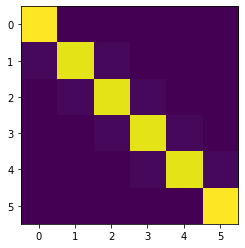

In [5]:
plt.imshow(M)

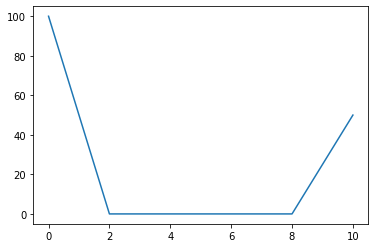

In [6]:
T0 = np.zeros([N,1])
T0[0] = 100
T0[-1] = 50
x = np.linspace(0, 10, N)
plt.plot(x, T0)
plt.show()

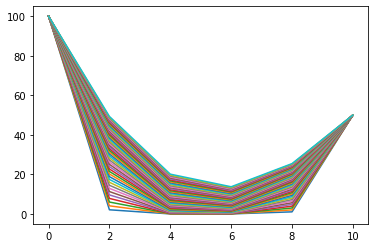

In [7]:
for i in range(50):
    T0 = M.dot(T0)
    plt.plot(x, T0)